In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:
1. Data Exploration and Understanding:



• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset. 
3. List all the columns and their data types.


In [3]:
wlr = pd.read_csv("WorldHappinessResult.csv")
wlr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [10]:
row,col = wlr.shape
print(f"Total number of rows: {row}")
print(f"Total number of columns: {col}")

Total number of rows: 143
Total number of columns: 9


In [16]:
wlr.dtypes

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.


In [21]:
wlr_mean = wlr['score'].mean()
wlr_median = wlr['score'].median()
wlr_standard_deviation = wlr['score'].std()
print(f"Mean of score is: {wlr_mean}")
print(f"Median of score is: {wlr_median}")
print(f"Standard Deviation of score is: {wlr_standard_deviation}")


Mean of score is: 5.52758041958042
Median of score is: 5.785
Standard Deviation of score is: 1.1707165099442993


In [25]:
country_wlrmin = wlr.loc[wlr['score'].idxmin(),'Country name']
country_wlrmax = wlr.loc[wlr['score'].idxmax(),'Country name']
print(f"Country with minimum happiness score is: {country_wlrmin}")
print(f"Country with maximum happiness score is: {country_wlrmax}")

Country with minimum happiness score is: Afghanistan
Country with maximum happiness score is: Finland



• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [31]:
wlr.isnull().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [35]:
greater_score_country_name = wlr[wlr['score'] >7.5]['Country name']
print(f"Country woth score greater than 7.5 are:\n{greater_score_country_name}")

Country woth score greater than 7.5 are:
0    Finland
1    Denmark
2    Iceland
Name: Country name, dtype: object


In [38]:
filtered_dataset = wlr.sort_values(by = 'Log GDP per capita',ascending=False)
filtered_dataset.head(10)
#reset index later

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
Low − (Score < 4) Medium − (4 ≤ Score ≤ 6) High − (Score > 6)

In [4]:
conditions = [
  wlr["score"] < 4,
  (wlr["score"] >= 4) & (wlr["score"] <= 6),
  wlr["score"] > 6
]
choices = ["Low","Medium","High"]
wlr["Happiness_Category"] = np.select(conditions, choices)
print(wlr[["Country name","score","Happiness_Category"]])

         Country name  score Happiness_Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]



2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

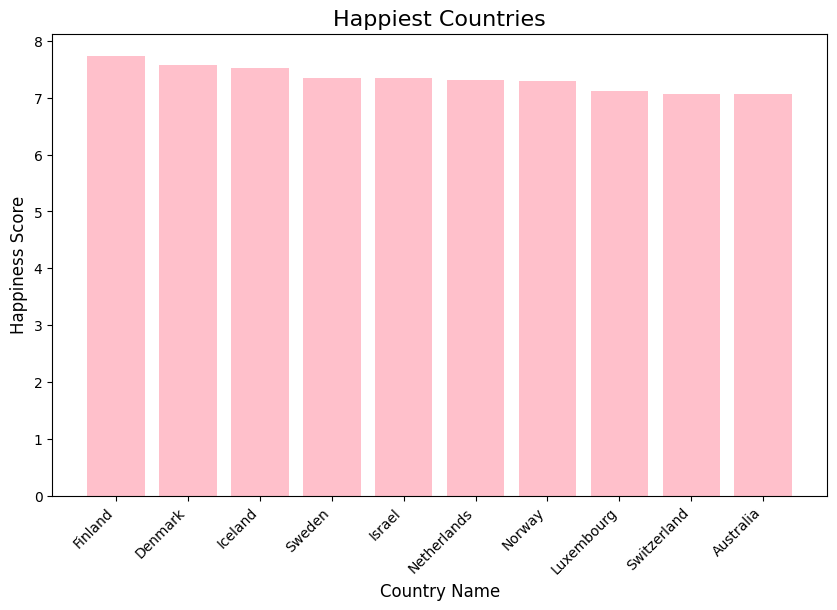

In [36]:
happiest_countries = wlr.sort_values(by = 'score',ascending=False)
x_values = happiest_countries['Country name'].head(10)
y_values = happiest_countries['score'].head(10)
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='pink')
plt.title('Happiest Countries', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


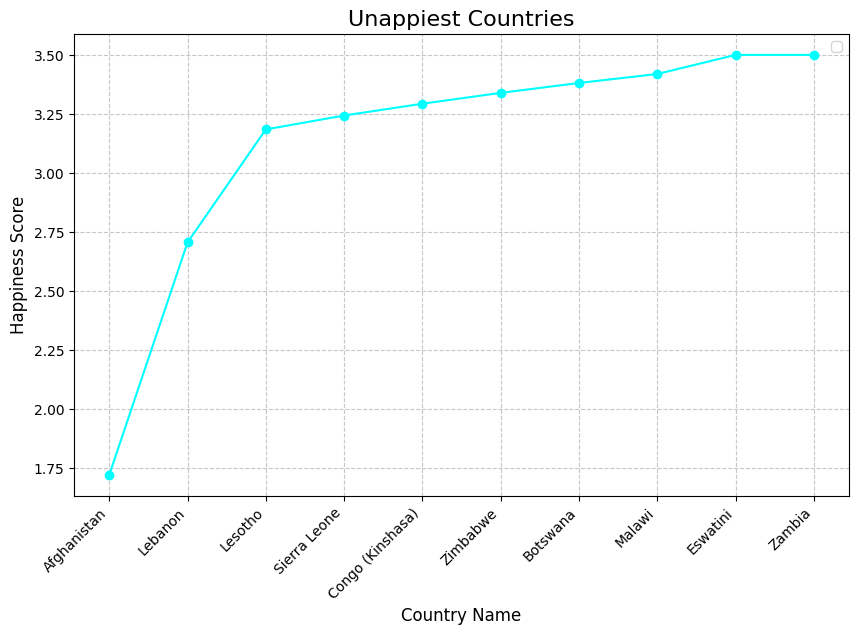

In [37]:
unhappiest_countries = wlr.sort_values(by = 'score',ascending=True)
x_values = unhappiest_countries['Country name'].head(10)
y_values = unhappiest_countries['score'].head(10)
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values,marker='o',color='cyan')
plt.title('Unappiest Countries', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

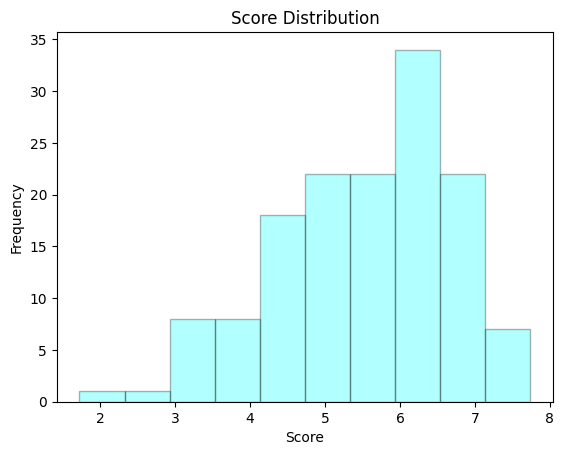

In [14]:
score_histogram = wlr['score']
plt.hist(score_histogram, color="cyan",edgecolor='black',alpha=0.3)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

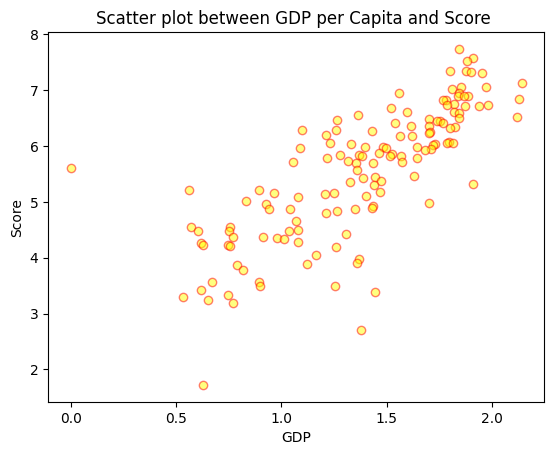

In [17]:
gdp_per_capita = wlr["Log GDP per capita"]
score_1 = wlr["score"]
plt.scatter(gdp_per_capita,score_1,color="yellow",edgecolor="red",alpha=0.5)
plt.title("Scatter plot between GDP per Capita and Score ")
plt.xlabel("GDP")
plt.ylabel("Score")
plt.show()


3.2 Problem - 2 - Some Advance Data Exploration Task


Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.


In [14]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

In [17]:
filtered_asian_list = wlr.loc[(wlr['Country name']).isin(south_asian_countries)].copy()
print(filtered_asian_list)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

In [11]:
filtered_asian_list.to_csv("SouthAsianCountries",index=False)


Task - 2 - Composite Score Ranking: Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support +0.30×Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

In [19]:
filtered_asian_list['Composite Score'] = (
    0.40 * filtered_asian_list['Log GDP per capita'] +
    0.30 * filtered_asian_list['Social support'] +
    0.30 * filtered_asian_list['Healthy life expectancy']
)
print(filtered_asian_list)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  
92                       0.115                1.783           0.8159  
107                      0.074    

In [36]:
ranked_south_asian = filtered_asian_list.sort_values(by='Composite Score', ascending=False)
ranked_south_asian.reset_index(drop=True, inplace=True)
print(ranked_south_asian[['Country name', 'Composite Score']])

  Country name  Composite Score
0        Nepal           0.8159
1        India           0.7874
2     Pakistan           0.7039
3   Bangladesh           0.6774
4  Afghanistan           0.3238


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


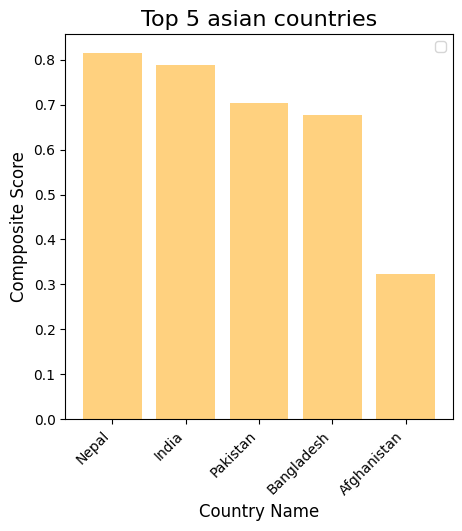

In [46]:
countries = ranked_south_asian['Country name'].head(5)
composite_score = ranked_south_asian['Composite Score'].head(5)
# Create the bar plot
plt.figure(figsize=(5, 5))
plt.bar(countries, composite_score,color='orange',alpha=0.5)
plt.title('Top 5 asian countries', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Compposite Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.show()

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.


In [20]:
gdp_q1 = filtered_asian_list['Log GDP per capita'].quantile(0.25)
gdp_q3 = filtered_asian_list['Log GDP per capita'].quantile(0.75)
gdp_iqr = gdp_q3 - gdp_q1
lower_bound_gdp = gdp_q1- 1.5 * gdp_iqr
upper_bound_gdp = gdp_q3 + 1.5 * gdp_iqr
print(f"Lower bound gdp:\n {lower_bound_gdp}")
print(f"Upper bound gdp:\n {upper_bound_gdp}")
score_q1 = filtered_asian_list['score'].quantile(0.25)
score_q3 = filtered_asian_list['score'].quantile(0.75)
score_iqr = score_q3 - score_q1
lower_bound_score = score_q1 - 1.5 * score_iqr
upper_bound_score = score_q3 + 1.5 * score_iqr
print(f"Lower bound score:\n {lower_bound_score}")
print(f"Upper bound score:\n {upper_bound_score}")

Lower bound gdp:
 0.7294999999999998
Upper bound gdp:
 1.3575000000000004
Lower bound score:
 2.7295000000000003
Upper bound score:
 5.8134999999999994


In [25]:
gdp_outlier = filtered_asian_list[(filtered_asian_list['Log GDP per capita'] < lower_bound_gdp) | (filtered_asian_list['Log GDP per capita'] > upper_bound_gdp)][['Country name','Log GDP per capita','score']]
score_outlier = filtered_asian_list[(filtered_asian_list['score'] < lower_bound_score) | (filtered_asian_list['score'] > upper_bound_score)][['Country name','Log GDP per capita','score']]

print(f" GDP outlier: \n{gdp_outlier.head()}")
print(f" Score outlier:\n {score_outlier.head()}")

 GDP outlier: 
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721
 Score outlier:
     Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


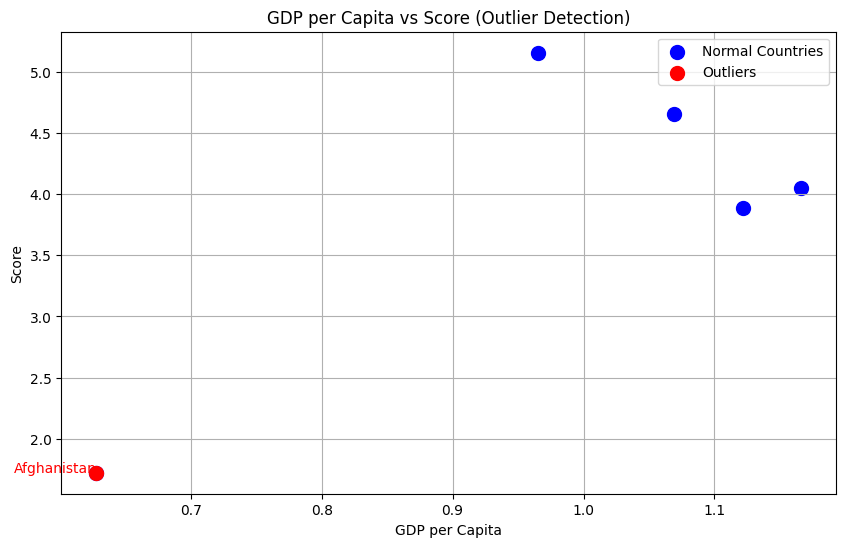

In [28]:
outliers = pd.concat([gdp_outlier, score_outlier]).drop_duplicates()
x = filtered_asian_list['Log GDP per capita']
y = filtered_asian_list['score']
plt.figure(figsize=(10, 6))
plt.scatter( x, y, color='blue', s=100, label='Normal Countries')
plt.scatter(outliers['Log GDP per capita'],outliers['score'], color='red', s=100, label='Outliers')
for i, row in outliers.iterrows():
    plt.text(row['Log GDP per capita'], row['score'], row['Country name'], color='red', fontsize=10, ha='right')
plt.title('GDP per Capita vs Score (Outlier Detection)')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()



Task - 4 - Exploring Trends Across Metrics: Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.


Task - 5 - Gap Analysis: Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [26]:
filtered_asian_list['GDP_score_gap'] = filtered_asian_list['Log GDP per capita'] - filtered_asian_list['score']
filtered_asian_list.reset_index(drop=True,inplace=True)
print(filtered_asian_list.head())

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual  Composite Score  \
0                      0.115                1.783           0.8159   
1                      0.074                1.907           

In [34]:
ascending_gpd_score_gap = filtered_asian_list.sort_values(by = 'GDP_score_gap',ascending=True)
descending_gpd_score_gap = filtered_asian_list.sort_values(by = 'GDP_score_gap',ascending=False)
filtered_asian_list.reset_index(drop=True,inplace=True)
print(f"In ascending order:\n {ascending_gpd_score_gap.head()}")
print(f"In descending order:\n {descending_gpd_score_gap.head()}")

In ascending order:
   Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual  Composite Score  \
0                      0.115                1.783           0.8159   
1                      0.074           

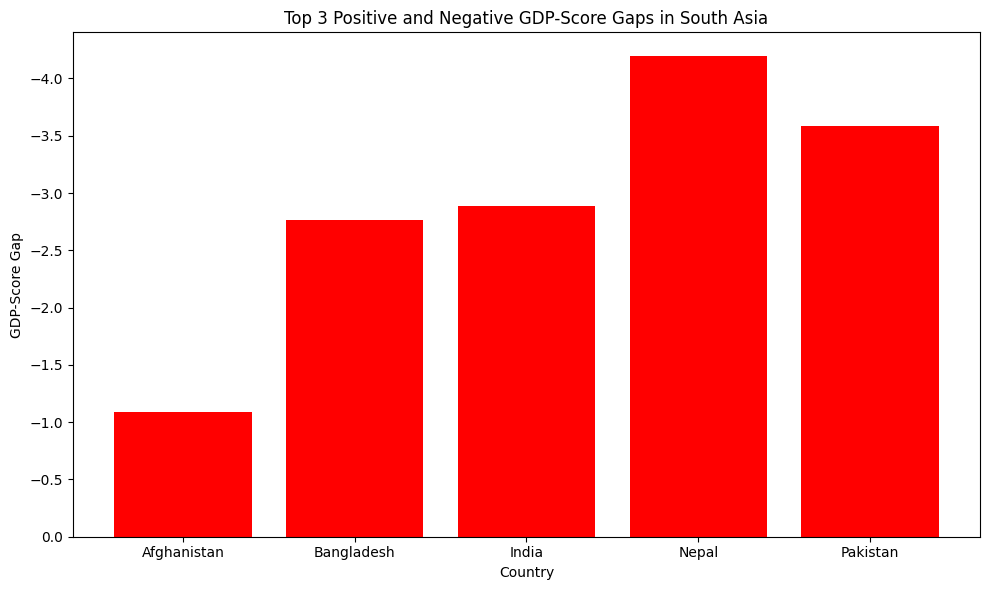

In [44]:
top_positive =descending_gpd_score_gap.head(3)
top_negative = ascending_gpd_score_gap.head(3)
top_gaps = pd.concat([top_positive, top_negative])

plt.figure(figsize=(10, 6))

colors = ['green' if gap > 0 else 'red' for gap in top_gaps['GDP_score_gap']]

plt.bar(top_gaps['Country name'], top_gaps['GDP_score_gap'], color=colors)

plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')

plt.gca().invert_yaxis()

# Show the chart
plt.tight_layout()
plt.show()


3.3 Problem - 3 - Comparative Analysis:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [45]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [47]:
filtered_middle_east_countries = wlr.loc[(wlr['Country name']).isin(middle_east_countries)].copy()
filtered_middle_east_countries.reset_index(drop=True,inplace=True)
print(filtered_middle_east_countries)

           Country name  score  Log GDP per capita  Social support  \
0                Israel  7.341               1.803           1.513   
1                Kuwait  6.951               1.845           1.364   
2  United Arab Emirates  6.733               1.983           1.164   
3          Saudi Arabia  6.594               1.842           1.361   
4               Bahrain  5.959                 NaN             NaN   
5                  Iraq  5.166               1.249           0.996   
6                  Iran  4.923               1.435           1.136   
7                Jordan  4.186               1.262           0.983   
8                 Yemen  3.561               0.671           1.281   
9               Lebanon  2.707               1.377           0.577   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.740                         0.641       0.153   
1                    0.661                         0.827       0.200   
2            

In [48]:
filtered_middle_east_countries.to_csv("MiddleEastCountries",index=False)


Complete the following task: 1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [56]:
# Calculate statistics
asian_score_mean = filtered_asian_list['score'].mean()
asian_score_sd = filtered_asian_list['score'].std()
middleeast_score_mean = filtered_middle_east_countries['score'].mean()
middleeast_score_sd = filtered_middle_east_countries['score'].std()

# Print statistics
print(f"Asian countries score mean: {asian_score_mean}")
print(f"Asian countries score standard deviation: {asian_score_sd}")
print(f"Middle East countries score mean: {middleeast_score_mean}")
print(f"Middle East countries score standard deviation: {middleeast_score_sd}")


Asian countries score mean: 3.8952000000000004
Asian countries score standard deviation: 1.3160025455902433
Middle East countries score mean: 5.412100000000001
Middle East countries score standard deviation: 1.5662011684327144


In [58]:
if asian_score_mean > middleeast_score_mean:
  print("South Asia has higher happiness scores on average.")
else:
  print("Middle east has higher happiness scores on average.")


Middle east has higher happiness scores on average.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

In [60]:
top3_asian_countries = filtered_asian_list.nlargest(3, 'score')
bottom3_asian_countries = filtered_asian_list.nsmallest(3, 'score')

top3_middleeast_countries = filtered_middle_east_countries.nlargest(3, 'score')
bottom3_middleeast_countries = filtered_middle_east_countries.nsmallest(3, 'score')

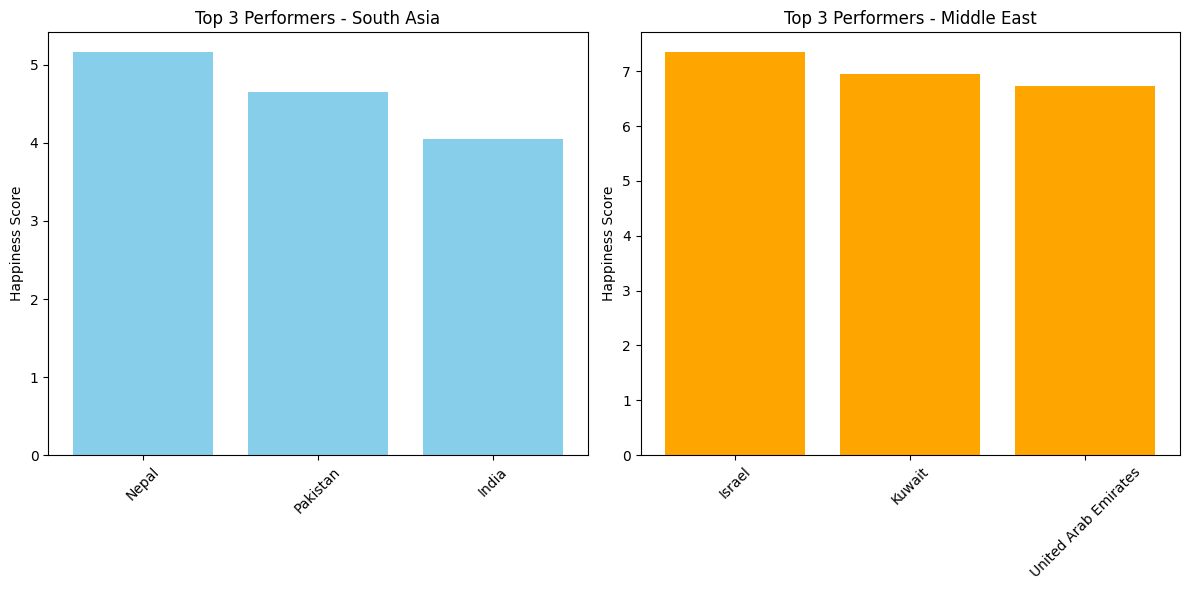

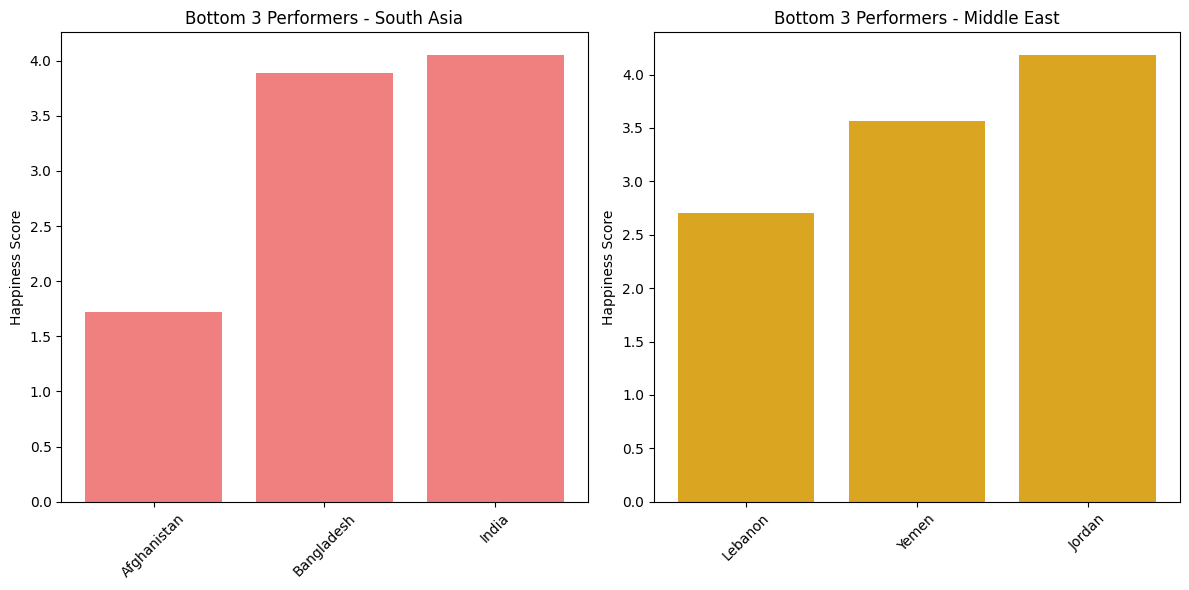

In [61]:
plt.figure(figsize=(12, 6))

# Top 3 South Asia
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.bar(top3_asian_countries['Country name'], top3_asian_countries['score'], color='skyblue')
plt.title('Top 3 Performers - South Asia')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)

# Top 3 Middle East
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.bar(top3_middleeast_countries['Country name'], top3_middleeast_countries['score'], color='orange')
plt.title('Top 3 Performers - Middle East')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Set up the figure for Bottom Performers
plt.figure(figsize=(12, 6))

# Bottom 3 South Asia
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.bar(bottom3_asian_countries['Country name'], bottom3_asian_countries['score'], color='lightcoral')
plt.title('Bottom 3 Performers - South Asia')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)

# Bottom 3 Middle East
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.bar(bottom3_middleeast_countries['Country name'], bottom3_middleeast_countries['score'], color='goldenrod')
plt.title('Bottom 3 Performers - Middle East')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
